<a href="https://colab.research.google.com/github/Ashutosh-Vermaa/Data-Analysis/blob/main/Data_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 11.2 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [2]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [3]:
# mounting my drive to access files that I've uploaded to my drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
hlo_dataset= pd.read_excel('/content/gdrive/MyDrive/hlo_database.xlsx')

In [5]:
hlo_dataset.head()

,code,country,year,subject,level,sourcetest,n_res,hlo,hlo_se,hlo_m,hlo_m_se,hlo_f,hlo_f_se,region,incomegroup
0,AFG,Afghanistan,2016,reading,pri,EGRA,1,315.45505,3.308458,320.97153,3.391902,307.07355,3.379419,South Asia,Low income
1,AGO,Angola,2011,reading,pri,EGRA,1,263.13571,3.331610,264.67056,3.118905,261.24457,3.413112,Sub-Saharan Africa,Lower middle income
2,ALB,Albania,2000,math,sec,PISA,1,410.24564,3.530675,401.86014,3.530971,417.89243,3.512387,Europe & Central Asia,Upper middle income
3,ALB,Albania,2000,reading,sec,PISA,1,348.84952,3.290668,319.07059,4.248581,377.55408,2.699219,Europe & Central Asia,Upper middle income
4,ALB,Albania,2000,science,sec,PISA,1,413.51315,2.843401,404.18893,2.694698,422.99924,2.729117,Europe & Central Asia,Upper middle income


In [6]:
def print_summary(title, value):
    print('-' * 80, title, '-' * 80, value, sep='\n')

def summarize_dataframe(frame):
    print_summary('Dataset Summary', frame.describe())
    print_summary('Null Values Count', frame.isnull().sum())

    for col in frame:
        print_summary(f'Unique values in column "{col}"', frame[col].unique())

In [ ]:
summarize_dataframe(hlo_dataset)

In [9]:
required_dataset= hlo_dataset[['code', 'country', 'hlo']]
required_dataset

,code,country,hlo
0,AFG,Afghanistan,315.45505
1,AGO,Angola,263.13571
2,ALB,Albania,410.24564
3,ALB,Albania,348.84952
4,ALB,Albania,413.51315
...,...,...,...
2018,ZMB,Zambia,300.84915
2019,ZWE,Zimbabwe,418.39478
2020,ZWE,Zimbabwe,355.12442
2021,ZWE,Zimbabwe,423.22330


In [18]:
grpby= required_dataset.groupby(['code', 'country'], as_index=False).mean()
grpby

,code,country,hlo
0,AFG,Afghanistan,315.455050
1,AGO,Angola,263.135710
2,ALB,Albania,411.644443
3,ARE,United Arab Emirates,451.133934
4,ARG,Argentina,418.347710
...,...,...,...
159,XKX,Kosovo,384.856620
160,YEM,Yemen,254.707320
161,ZAF,South Africa,351.990029
162,ZMB,Zambia,301.429876


In [19]:
summarize_dataframe(grpby)

--------------------------------------------------------------------------------
Dataset Summary
--------------------------------------------------------------------------------
              hlo
count  164.000000
mean   417.028760
std     82.496062
min    244.802370
25%    349.147955
50%    415.810244
75%    490.311813
max    578.514200
--------------------------------------------------------------------------------
Null Values Count
--------------------------------------------------------------------------------
code       0
country    0
hlo        0
dtype: int64
--------------------------------------------------------------------------------
Unique values in column "code"
--------------------------------------------------------------------------------
['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLZ' 'BRA' 'BWA' 'CAN' 'CHE' 'CHL' 'CHN'
 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DNK'
 'DOM' 'DZA' 'EC

In [20]:
grpby.columns

Index(['code', 'country', 'hlo'], dtype='object')

In [23]:
grpby.set_index('code',inplace=True)

In [21]:
# Get the Natural Earth countries Geo Dataset
geojson_path = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_10m_admin_0_countries_lakes.geojson"
geo_data = gpd.read_file(geojson_path)

# Select the Country Code (ADM0_A3) & it's geometry
geo_by_country = geo_data[['ADM0_A3', 'geometry']]

# We need to re-project this geometry to correctly draw the map
geo_by_country = geo_by_country.to_crs('+proj=robin')

# Just like before, we set the country as index for easier merging!
geo_by_country.set_index('ADM0_A3', inplace=True)
geo_by_country

,geometry
ADM0_A3,
ABW,"POLYGON ((-6556218.547 1329133.779, -6557344.5..."
AFG,"POLYGON ((6607222.227 3981532.821, 6600698.558..."
AGO,"MULTIPOLYGON (((1095124.155 -1785301.587, 1095..."
AIA,"MULTIPOLYGON (((-5867200.939 1947908.072, -587..."
ALB,"MULTIPOLYGON (((1816550.676 4370682.177, 18158..."
...,...
WSM,"MULTIPOLYGON (((-16069528.501 -1490713.305, -1..."
YEM,"MULTIPOLYGON (((5003299.773 1296085.640, 50035..."
ZAF,"MULTIPOLYGON (((3168124.136 -5008625.412, 3165..."


In [24]:
merged = geo_by_country.merge(grpby, left_index=True, right_index=True)
merged

,geometry,country,hlo
AFG,"POLYGON ((6607222.227 3981532.821, 6600698.558...",Afghanistan,315.455050
AGO,"MULTIPOLYGON (((1095124.155 -1785301.587, 1095...",Angola,263.135710
ALB,"MULTIPOLYGON (((1816550.676 4370682.177, 18158...",Albania,411.644443
ARE,"MULTIPOLYGON (((4959525.298 2591949.821, 49620...",United Arab Emirates,451.133934
ARG,"MULTIPOLYGON (((-5421145.575 -5826869.554, -54...",Argentina,418.347710
...,...,...,...
VUT,"MULTIPOLYGON (((15753473.019 -2165630.240, 157...",Vanuatu,317.028410
YEM,"MULTIPOLYGON (((5003299.773 1296085.640, 50035...",Yemen,254.707320
ZAF,"MULTIPOLYGON (((3168124.136 -5008625.412, 3165...",South Africa,351.990029
ZMB,"POLYGON ((2934183.813 -918610.908, 2935708.832...",Zambia,301.429876


In [25]:
# Get all Country codes in Geo Data Frame not in our Emission Data Frame
no_data = geo_by_country.loc[~geo_by_country.index.isin(merged.index)]

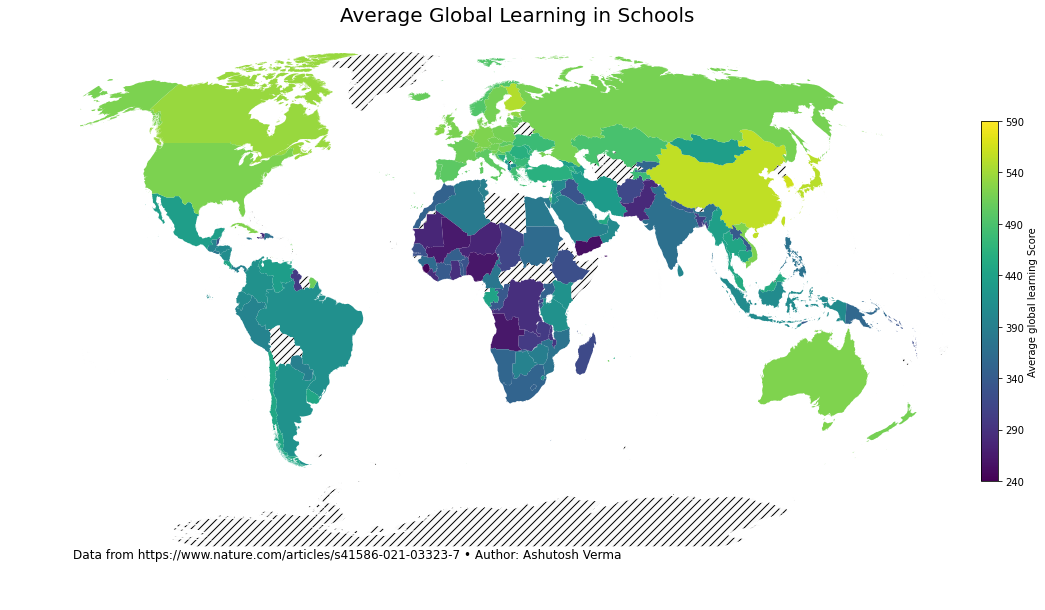

In [29]:
vmin, vmax = 240, 590

# Create an initial geo plot
ax = merged.plot(column='hlo',
                 figsize=(16,10),
                 legend=False,
                 vmin=vmin, vmax=vmax) #geo_by_country.plot(column='val', colormap='hot', vmin=vmin, vmax=vmax)

# Add colorbar to the figure
fig = ax.get_figure()
cax = fig.add_axes([0.915, 0.25, 0.015, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Fake up the array of the scalar mappable. Urgh...
sm._A = []
ticks = [vmin, 290, 340, 390, 440, 490, 540, vmax]
cbar = fig.colorbar(sm,
                    cax=cax,
                    ticks=ticks)
cbar.ax.set_yticklabels(['240', '290', '340', '390', '440', '490', '540', '590'])
cbar.set_label('Average global learning Score')

# Shade the countries that have no emission data
no_data.plot(ax=ax, color='#fafafa', hatch='///')

# Set title
ax.set_title('Average Global Learning in Schools',
             fontdict={'fontsize': 20},
             loc='center')

# Add anootation
ax.annotate("Data from https://www.nature.com/articles/s41586-021-03323-7 • Author: Ashutosh Verma",
            xy=(0.07, 0.085),
            size=12,
            xycoords='figure fraction')

# Turn off the axis box
ax.set_axis_off()

# Center the geo plot
ax.set_xlim([-1.3e7, 1.7e7]);

# Show the figure!
ax.get_figure();